### 📦 Imports and Setup

In this section, we import all the necessary libraries for building a machine learning pipeline:

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [17]:
df = pd.read_csv('adult.csv')

### 🔄 Handling Missing Values

We replace all `'?'` entries in the dataset with `np.nan` to standardize missing values. This ensures they can be properly handled later using imputation or other preprocessing techniques.

In [18]:
df.replace('?', np.nan, inplace=True)

### 🧹 Feature Separation

We split features into numerical and categorical columns to apply appropriate preprocessing:
- `numerical_cols`: all numeric columns
- `categorical_cols`: all object (string) columns, excluding the target `income`


In [19]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes('object').columns.drop('income').tolist()

### ⚙️ Preprocessing Pipelines

- **Categorical**: Impute missing values with most frequent, then one-hot encode.
- **Numerical**: Standard scale the features.
- Combined using `ColumnTransformer` for full preprocessing.


In [20]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessing = ColumnTransformer([
    ('numerical_cols', numerical_pipeline, numerical_cols),
    ('categorical_cols', categorical_pipeline, categorical_cols)
])


In [21]:
X = df[categorical_cols + numerical_cols]
y = df['income']

### 🌲 Model Evaluation: Decision Tree Depth Tuning

Tested `max_depth` from 1 to 10 using a pipeline with preprocessing and a decision tree classifier.  
Evaluated using 5-fold cross-validation and printed mean accuracy for each depth.


In [22]:
for depth in range(1, 11):
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', DecisionTreeClassifier(max_depth=depth, random_state=42))
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"max_depth={depth}, mean accuracy={np.mean(scores):.4f}")

max_depth=1, mean accuracy=0.7592
max_depth=2, mean accuracy=0.7835
max_depth=3, mean accuracy=0.8112
max_depth=4, mean accuracy=0.8121
max_depth=5, mean accuracy=0.8019
max_depth=6, mean accuracy=0.8021
max_depth=7, mean accuracy=0.8020
max_depth=8, mean accuracy=0.8034
max_depth=9, mean accuracy=0.7995
max_depth=10, mean accuracy=0.8009


#### Train-test split example: splitting data into 75% training and 25% testing sets


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

### Pipeline with preprocessing and Decision Tree classifier (max depth 4)


In [24]:
model = Pipeline([
    ('preproccessor', preprocessing),
    ('DecisionTreeClassifier', RandomForestClassifier(n_estimators=100, max_depth=4, random_state=123))
])

In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('preproccessor',
                 ColumnTransformer(transformers=[('numerical_cols',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('categorical_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('DecisionTreeClassifier',
                 RandomForestClassifier(max_depth=4, random_state=123))])

In [26]:
y_pred = model.predict(X_test)

### Plotting Decision Tree accuracy vs. max depth using 5-fold cross-validation


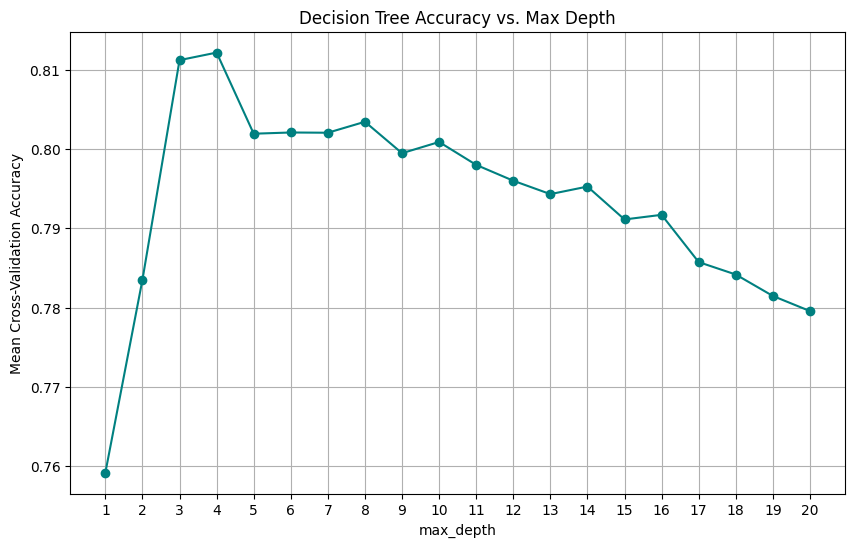

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

depths = range(1, 21)
mean_scores = []

for depth in depths:
    pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', DecisionTreeClassifier(max_depth=depth, random_state=42))
    ])
    scores = cross_val_score(pipeline, X,y, cv=5, scoring='accuracy')
    mean_scores.append(np.mean(scores))

plt.figure(figsize=(10, 6))
plt.plot(depths, mean_scores, marker='o', linestyle='-', color='teal')
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.xlabel("max_depth")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.grid(True)
plt.xticks(depths)
plt.show()


### Saving a trained ML model using joblib


In [28]:
import joblib

joblib.dump(model, 'DecisionTreeClassifierModel.joblib')

['DecisionTreeClassifierModel.joblib']